In [70]:
import os
import sys

sys.path.append('..')
from models import *
import numpy as np
import pandas as pd
import sklearn
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from numpy import zeros
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
le = LabelEncoder()

df = pd.read_hdf("../../data_extract/features_dataset_2b.h5")

In [71]:
NUM_PEOPLE = 2
df = df.loc[df['id']<NUM_PEOPLE]

In [72]:
clist = ["chroma{}".format(i) for i in range(12)]
lclist = ["lc{}".format(i) for i in range(12)]
df[lclist] = np.log(df[clist])
flist = ["mfcc{}".format(i) for i in range(14)]+lclist+["centroid","crest","flatness","kurtosis","mean"]
df_train, df_cross, df_test = get_partitions(df)

In [73]:
scaler = preprocessing.StandardScaler().fit(df_cross[flist])
df_cross.loc[:,flist] = scaler.transform(df_cross[flist])
X_test = np.array(df_cross[flist])
Y_test = np.array(df_cross['id'])
x_test = [X_test[i] for i in range(200)]+[X_test[len(X_test)-i-1] for i in range(200)]
y_test = [Y_test[i] for i in range(200)]+[Y_test[len(Y_test)-i-1] for i in range(200)]

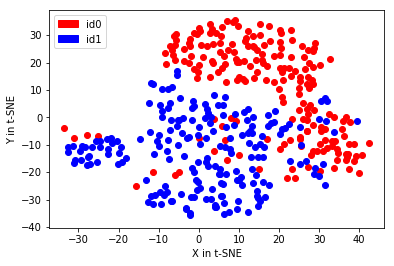

In [75]:
tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(x_test)

markers=('o', 'o')
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y_test)):
    plt.scatter(x=x_test_2d[y_test==cl,0], y=x_test_2d[y_test==cl,1], c=color_map[idx], marker=markers[idx], label=cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
red_patch = mpatches.Patch(color='red', label='id0')
blue_patch = mpatches.Patch(color='blue', label='id1')
plt.legend(handles=[red_patch,blue_patch],loc='upper left')
plt.show()